In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [6]:
base_str = "../randomsearch_convae_simulated_clf/"
param_vals = np.load(base_str+"run_80hyperparam_vals_ours.npy")
losses = np.load(base_str+"run_80loss_vals_ours.npy")
performance = np.load(base_str+"run_80performance_ours.npy")

In [10]:
print(performance.shape)
print("experiments, train/test, scores, classes")
print(performance[0])

(13, 2, 3, 2)
experiments, train/test, scores, classes
[[[0.76487579 0.78223649]
  [0.72508215 0.82412627]
  [0.80929095 0.74439919]]

 [[0.74377224 0.77429467]
  [0.71331058 0.80456026]
  [0.77695167 0.74622356]]]


In [27]:
proton_test_f1 = performance[:, 1, 0, 1]
proton_sort_ind = np.flip(np.argsort(proton_test_f1))
sorted_proton_test_f1 = proton_test_f1[proton_sort_ind]

In [18]:
losses = losses[proton_sort_ind]
param_vals = param_vals[proton_sort_ind]

In [23]:
losses.shape

(13, 2, 2000)

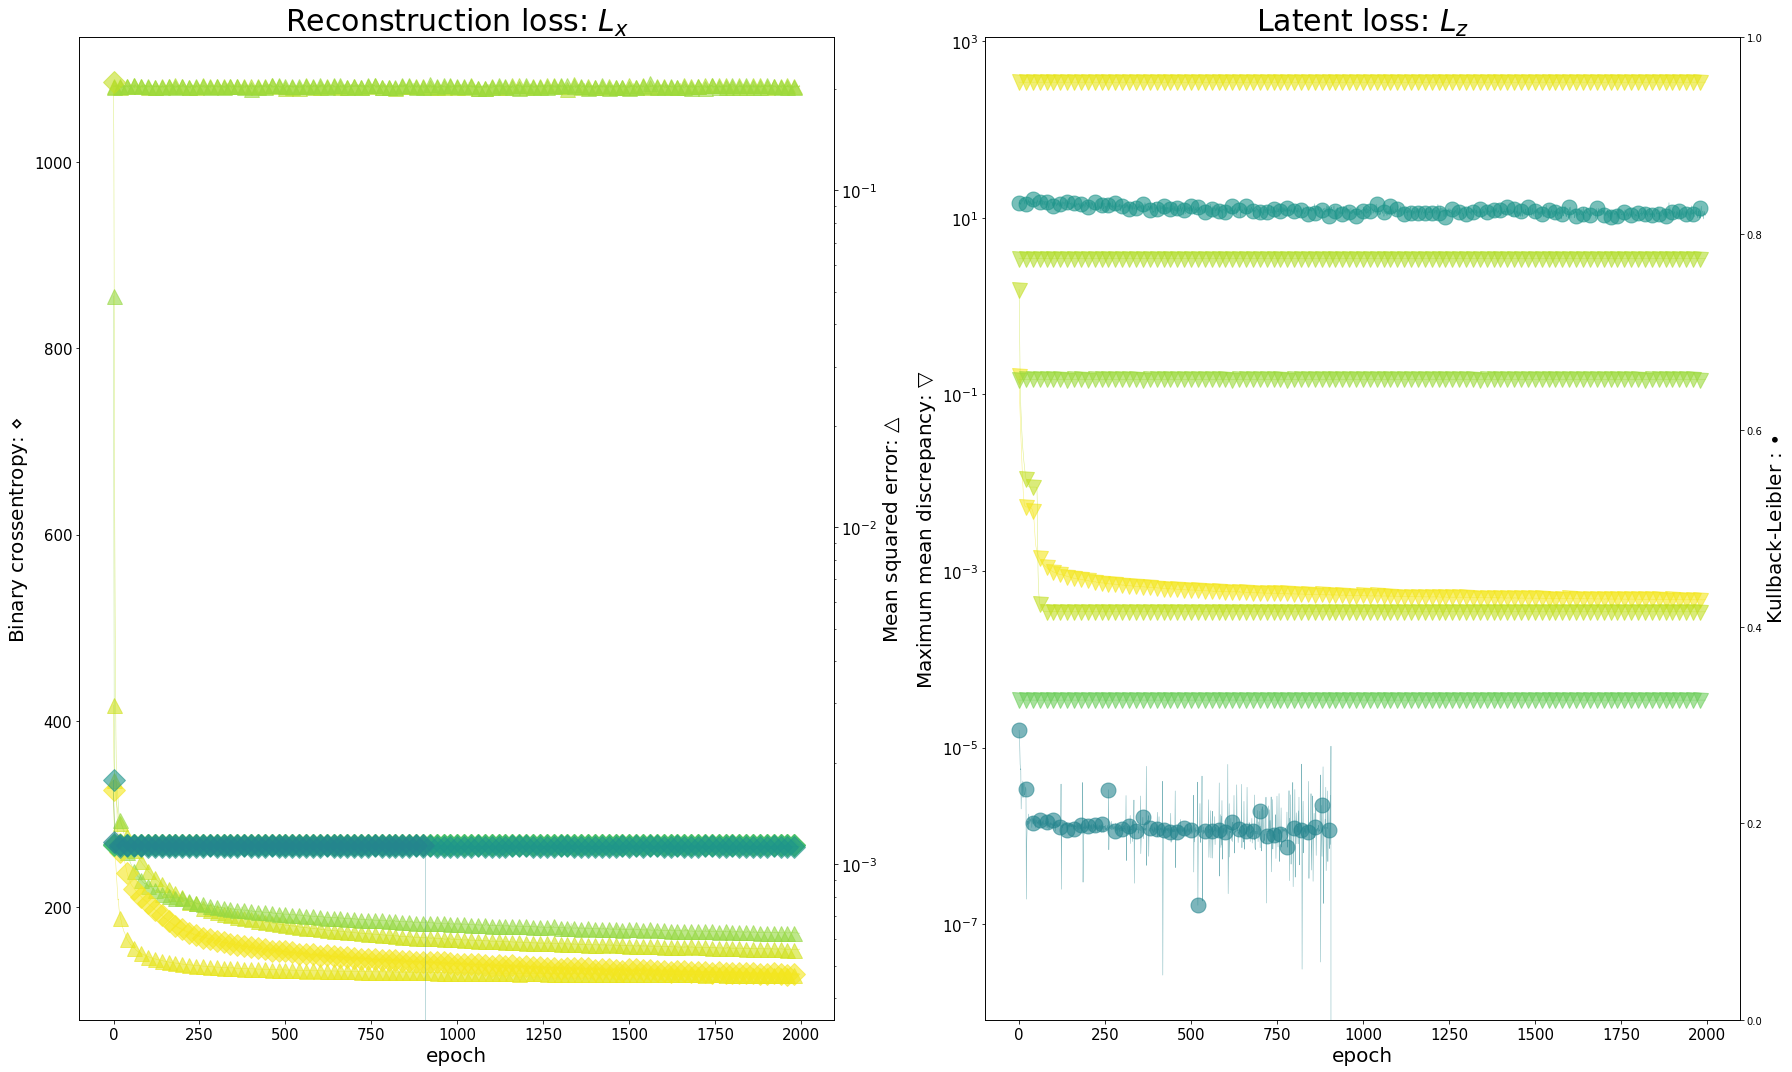

In [96]:
viridis = matplotlib.cm.get_cmap('viridis')
loss_names = [r"$L_x$", r"$L_z$"]

fig, ax = plt.subplots(ncols=losses.shape[1], figsize=(25, 15))
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

#fig.suptitle("Loss curves from simulated parameter search", size=35)

ax[1].set_ylabel(r"Maximum mean discrepancy: $\bigtriangledown$", size=20)
ax3.set_ylabel(r"Kullback-Leibler : $\bullet$", size=20)

ax2.set_ylabel(r"Mean squared error: $\bigtriangleup$", size=20)
ax[0].set_ylabel(r"Binary crossentropy: $\diamond$", size=20)


ax[0].set_title(r"Reconstruction loss: "+loss_names[0], size=30)
ax[1].set_title("Latent loss: "+loss_names[1], size=30)

for j in range(losses.shape[0]):
    for i, a in enumerate(ax):
        if i == 1:
            beta = param_vals[j][1][0]
            mode = param_vals[j][2]
            for l, v in mode.items():
                if v:
                    if l != "batchnorm":
                        which = l
            if which == "include_KL":
                fmt = "o-"
            elif which == "include_MMD":
                fmt = "v-"
            else:
                fmt = "s-"
        else:
            beta = 1
            if np.any(losses[j, i, :][50:]>1e1):
                fmt = "^-"
            else:
                fmt = "D-"
                a = ax2
        loss = losses[j, i, 3:]#/beta
        a.semilogy(
            np.arange(loss.shape[0]),
            loss,
            fmt,
            markevery=20,
            color=viridis(sorted_proton_test_f1[j]),
            markersize=15,
            linewidth=0.5,
            alpha=0.6
        )
        a.tick_params(axis='both', which='major', labelsize=15)
        a.set_xlabel("epoch", size=20)

ax[0].set_yscale("linear")
plt.tight_layout()
plt.savefig("../plots/simulated_clf/randomsearch_loss.png")
plt.savefig("../plots/simulated_clf/randomsearch_loss.pdf")

In [97]:
param_vals[0]

array([list([[2, 2, 2, 4, 16], [11, 11, 9, 5, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], 5]),
       list([10.0, 0.001, 0.38124136263062236, 0.99, 100]),
       {'simulated_mode': False, 'restore_mode': False, 'include_KL': False, 'include_MMD': True, 'include_KM:': False, 'batchnorm': True},
       {}], dtype=object)